# Visualization
In the previous notebook (data_cleaning_and_EDA) we created new csv file named `clean_csv.csv`
that contains clean df.

In this section ...

In [1]:
import pandas as pd

# Wordcloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./clean_csv.csv")
df.drop(columns="Unnamed: 0", axis=1, inplace=True)
df

,category,merged_text
0,business,ceo company executive focus employee experienc...
1,business,differently love take amount stress see succes...
2,business,transition qa engineer developer personal expe...
3,business,president indonesia annoyed cook oil crude pal...
4,business,magento problem owner online shop face overcom...
...,...,...
7677,weather,climate warming raise danger aflatoxin contami...
7678,weather,shower mlb rainouts day since star ace max sch...
7679,weather,sandstorm suspend flight many iraqis struggle ...
7680,weather,coalition climate target consistent c global h...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     7682 non-null   object
 1   merged_text  7682 non-null   object
dtypes: object(2)
memory usage: 120.2+ KB


### Pie Chart

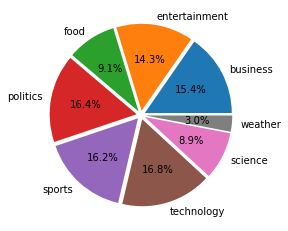

In [4]:


count_of_categories_articles = df['category'].value_counts(sort=False).to_list()
categories = df['category'].unique()

    
plt.pie(count_of_categories_articles, 
        labels = categories,
        autopct = "%1.1f%%",
        explode = [0.05 for _ in categories])

plt.show()

### Tokenization 

In [5]:
from nltk import word_tokenize

df['merged_text'] = df['merged_text'].apply(word_tokenize)
df

,category,merged_text
0,business,"[ceo, company, executive, focus, employee, exp..."
1,business,"[differently, love, take, amount, stress, see,..."
2,business,"[transition, qa, engineer, developer, personal..."
3,business,"[president, indonesia, annoyed, cook, oil, cru..."
4,business,"[magento, problem, owner, online, shop, face, ..."
...,...,...
7677,weather,"[climate, warming, raise, danger, aflatoxin, c..."
7678,weather,"[shower, mlb, rainouts, day, since, star, ace,..."
7679,weather,"[sandstorm, suspend, flight, many, iraqis, str..."
7680,weather,"[coalition, climate, target, consistent, c, gl..."


### Bar Plot

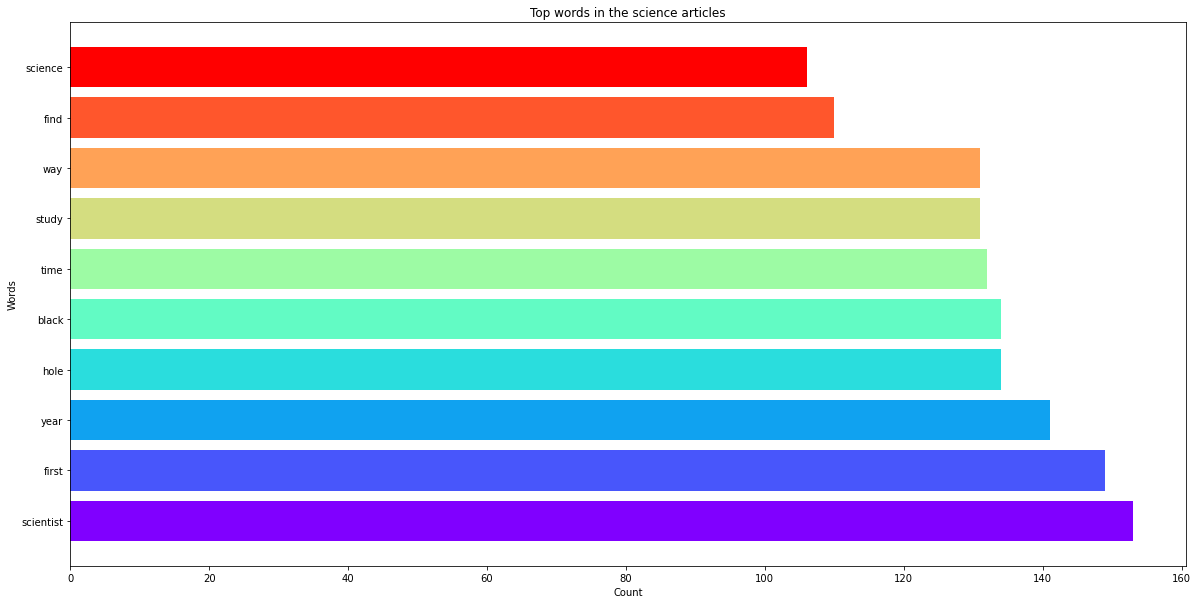

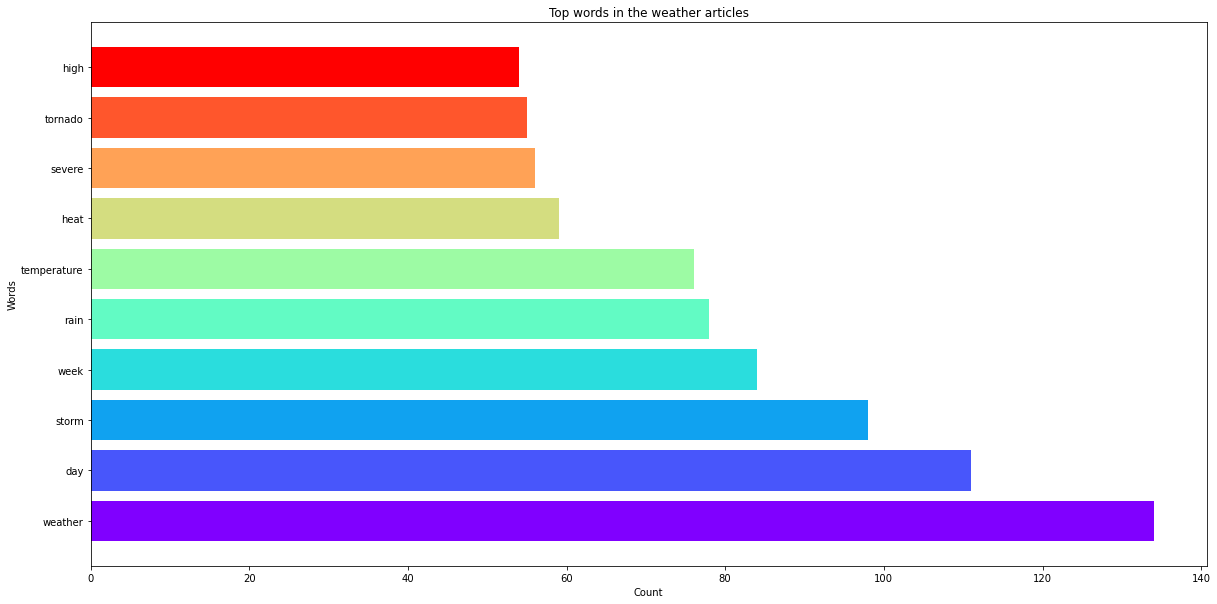

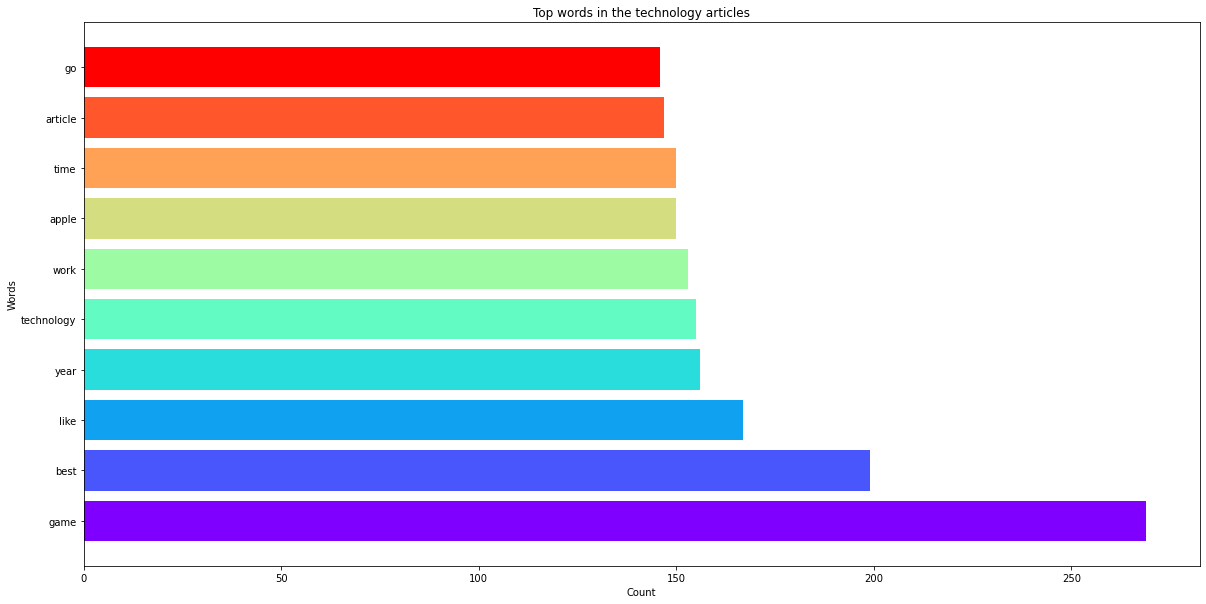

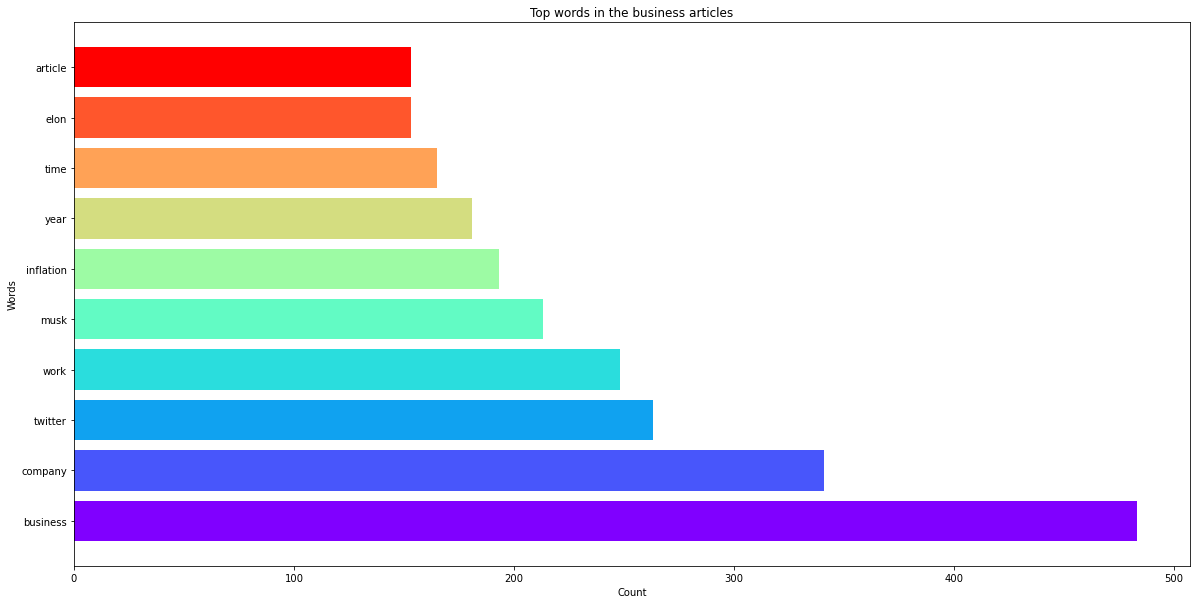

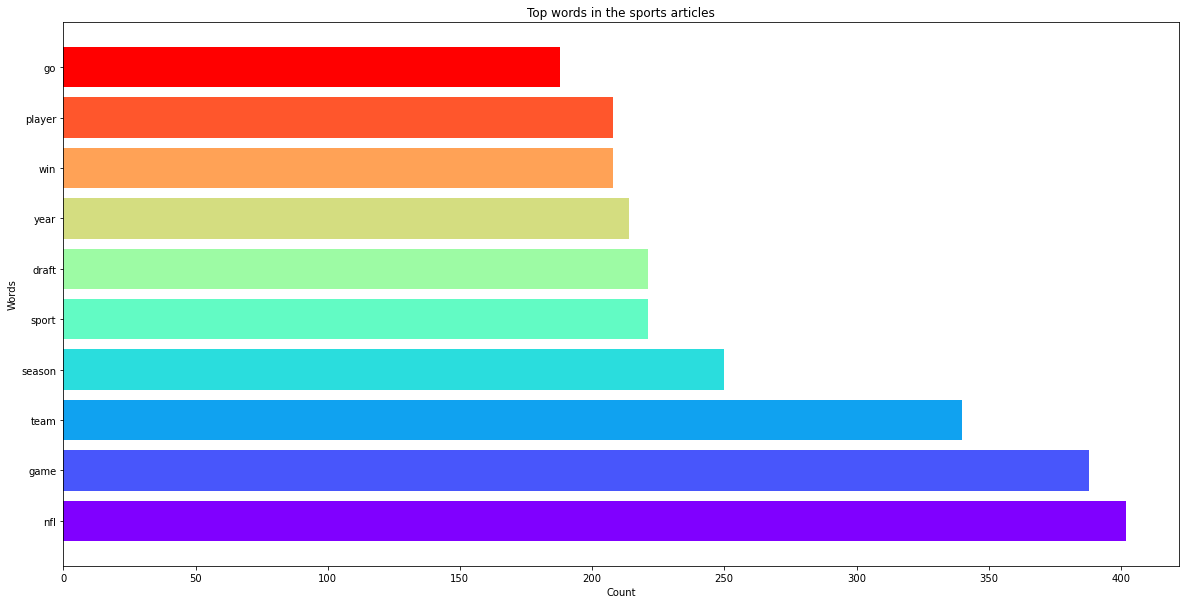

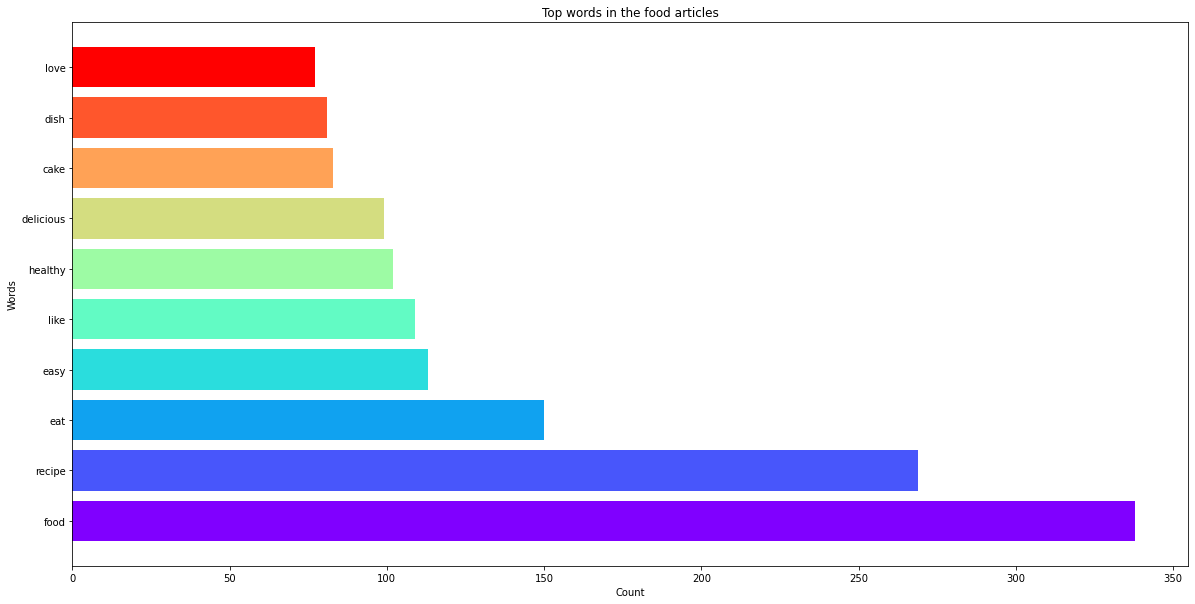

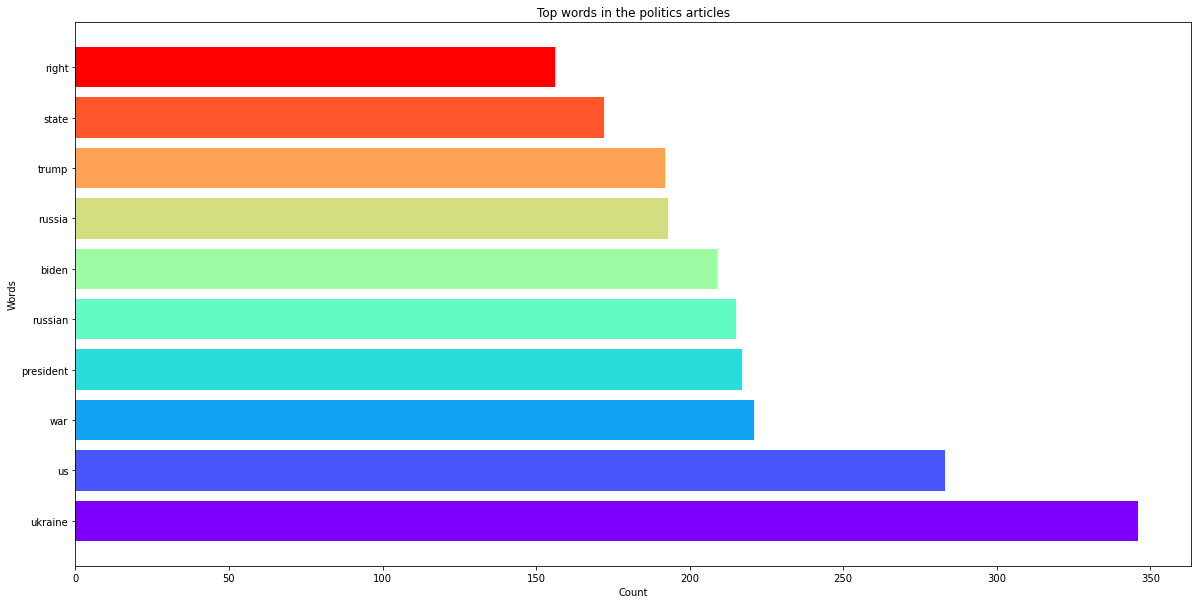

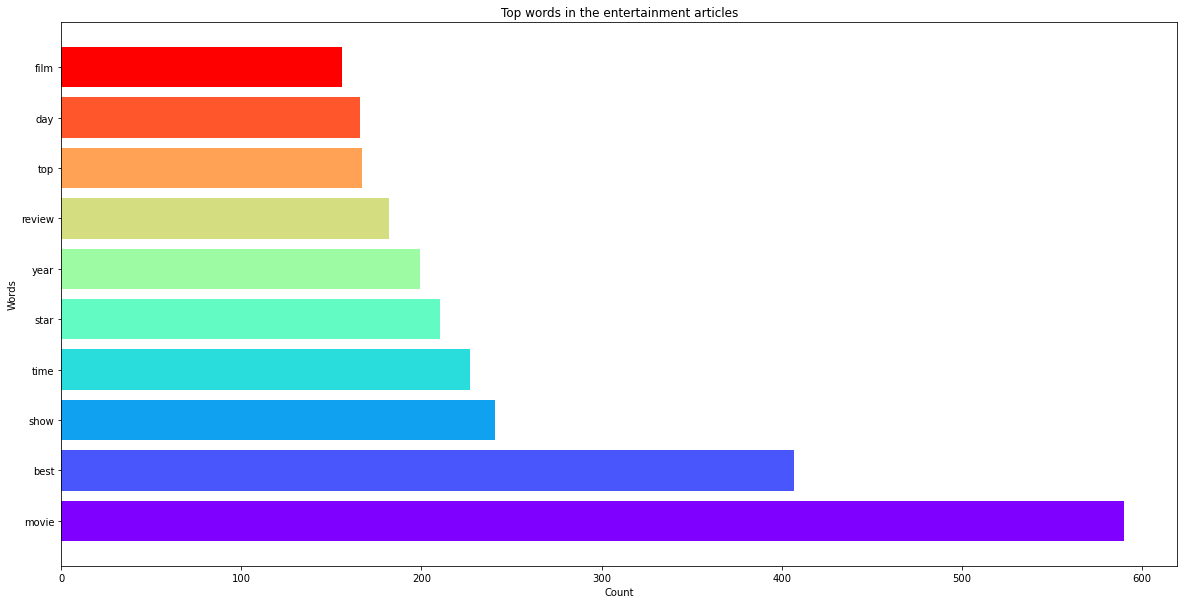

In [6]:
import itertools
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

for category in set(df["category"]):
    category_words = df[df["category"] == category]["merged_text"]
    
    filtered_words = list(itertools.chain.from_iterable(category_words))        
    counted_words = collections.Counter(filtered_words)

    words = []
    counts = []
    for letter, count in counted_words.most_common(10):
        words.append(letter)
        counts.append(count)
        
    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10
    
    plt.title(f'Top words in the {category} articles')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)
    plt.show()
        
    

### Distribution of Words

In [7]:
df["words_count"] = df["merged_text"].apply(len)
df

,category,merged_text,words_count
0,business,"[ceo, company, executive, focus, employee, exp...",24
1,business,"[differently, love, take, amount, stress, see,...",28
2,business,"[transition, qa, engineer, developer, personal...",10
3,business,"[president, indonesia, annoyed, cook, oil, cru...",36
4,business,"[magento, problem, owner, online, shop, face, ...",22
...,...,...,...
7677,weather,"[climate, warming, raise, danger, aflatoxin, c...",42
7678,weather,"[shower, mlb, rainouts, day, since, star, ace,...",15
7679,weather,"[sandstorm, suspend, flight, many, iraqis, str...",38
7680,weather,"[coalition, climate, target, consistent, c, gl...",37


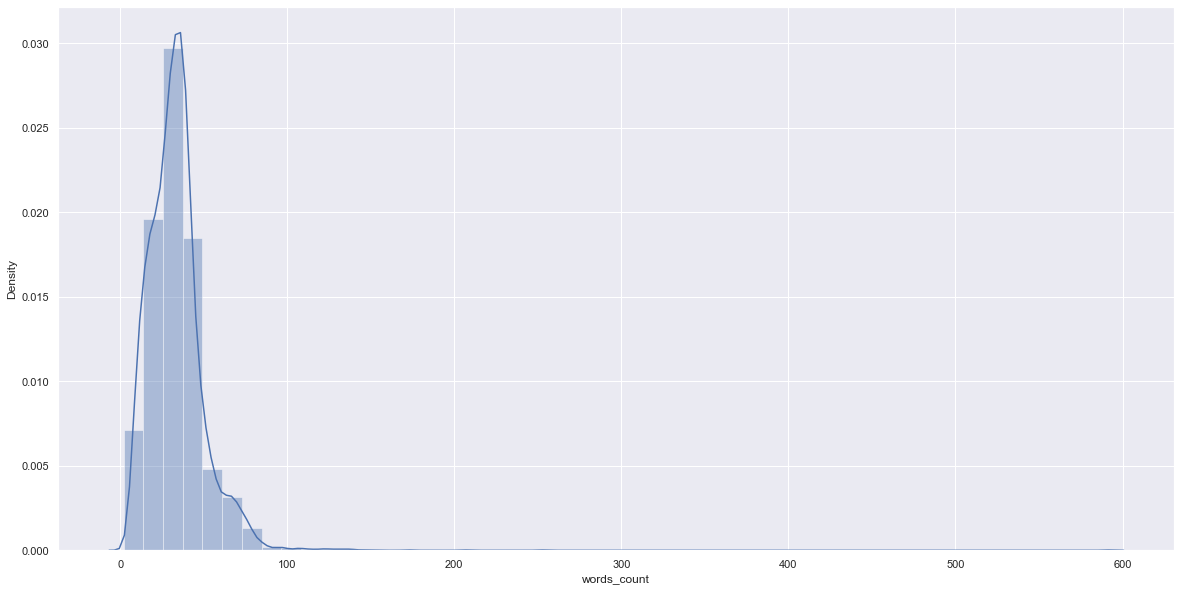

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

sns.set(rc={"figure.figsize": (20, 10)})
ax = sns.distplot(df["words_count"])
plt.show()


In [9]:
print(f"df size before remove 100+ words: {df.shape}")
df = df[df["words_count"] < 100]
print(f"df size after remove 100+ words: {df.shape}")


df size before remove 100+ words: (7682, 3)
df size after remove 100+ words: (7654, 3)


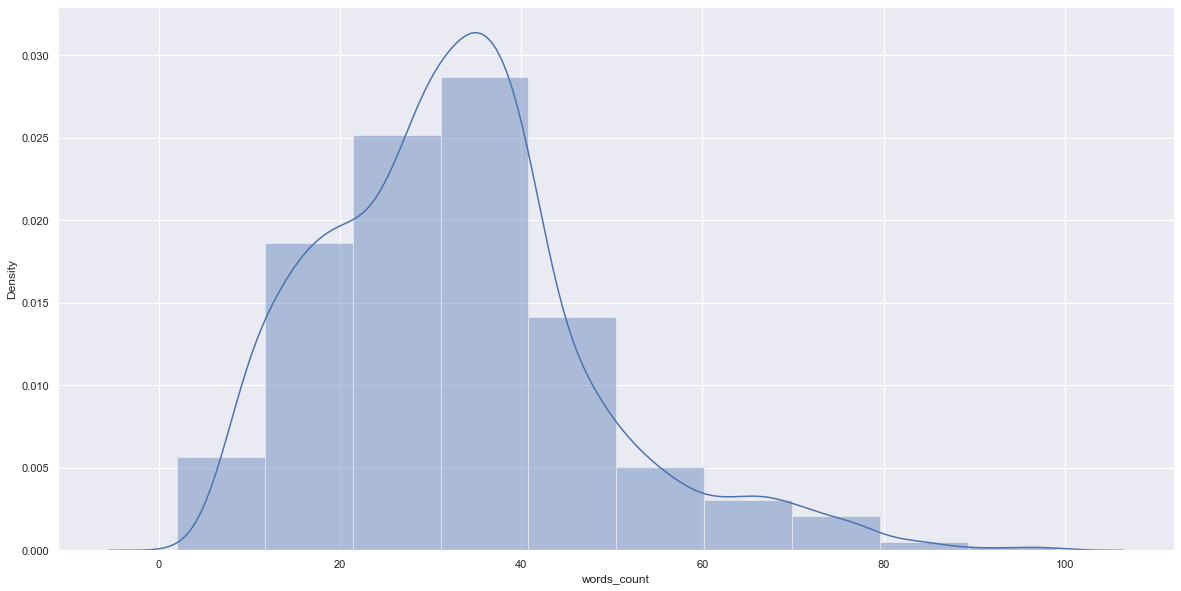

In [10]:
sns.set(rc={"figure.figsize": (20, 10)})
ax = sns.distplot(df["words_count"], bins=10)
plt.show()

In [12]:
# Remove words_counts for ml part
df.drop(columns="words_count", axis=1, inplace=True)

In [13]:
df.to_csv('ml_csv.csv')